# 住宅価格の回帰


## 今回使う手法の一覧


scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト


# データセットの準備


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

house_data = pd.read_csv("train.csv")
print(house_data.shape)

(1460, 81)


/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 回帰問題の流れ


## 練習のための準備


## 【問題1】練習のために特徴量の選択


In [2]:
house_price = pd.read_csv("train.csv")
X = np.array(house_price[["GrLivArea", "YearBuilt"]])
y = np.array(house_price["SalePrice"])

## 【問題2】線形回帰による推定と評価


In [3]:
SSx = StandardScaler()
SSx.fit(X)
X_transform = SSx.transform(X)

SSy = StandardScaler()
SSy.fit(y.reshape(-1,1))
y_transform = SSy.transform(y.reshape(-1,1)).reshape(-1)

/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=0)

In [5]:
y_test.shape
X_test.shape

(292, 2)

In [6]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
y_pre = lr.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pre)
mse

0.46649207942478726

In [9]:
#可視化

def visualize(model,y_test,y_pre,):
    plt.title(str(model))
    plt.xlabel("y_test")
    plt.ylabel("y_pre")
    plt.scatter(y_test, y_pre)
    plt.axis("equal")
    plt.show()

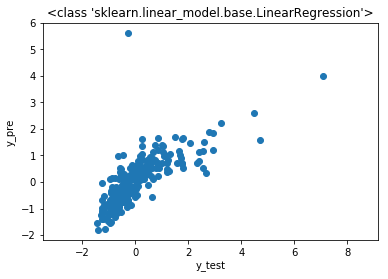

In [10]:
visualize(LinearRegression,y_test,y_pre)

## 【問題3】手法の比較

以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト


In [27]:
def sklearn_model(model_list,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    df_mse = pd.DataFrame([], index=["MSE"])
    for model2 in model_list:
        model= eval(model2)()
        model.fit(X_train,y_train)
        y_pre = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pre)
        print(str(model2),"_mse",":",mse,sep="")
        visualize(model2,y_test,y_pre)
        df_mse[model2] = mse
    return(df_mse)

LinearRegression_mse:0.46649207942478726


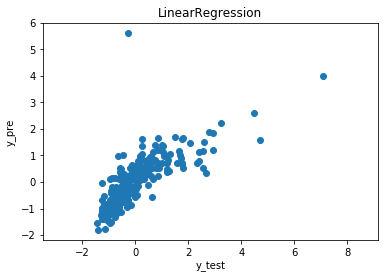

SVR_mse:0.37886829724665033


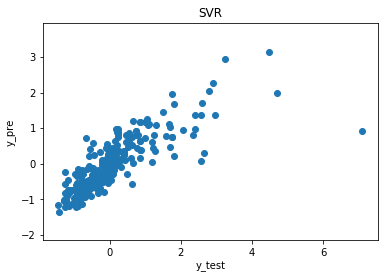

DecisionTreeRegressor_mse:0.5128464883358094


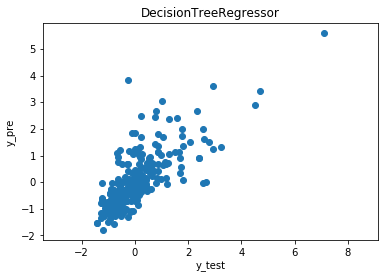

RandomForestRegressor_mse:0.2926110708470813


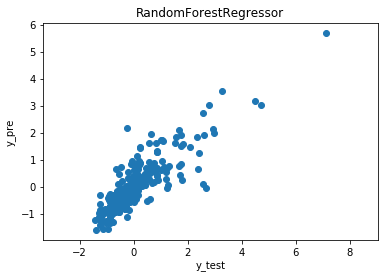

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,0.466492,0.378868,0.512846,0.292611


In [28]:
model_list = ["LinearRegression","SVR","DecisionTreeRegressor","RandomForestRegressor"]
sklearn_model(model_list)


線形回帰,SVM,決定木,ランダムフォレストを試したが、ランダフォレストの平均二乗誤差が最も低かった。